In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load in google's mobility data
# mobility data source: Google LLC "Google COVID-19 Community Mobility Reports".
# https://www.google.com/covid19/mobility/ Accessed: 6/12/2020.
data = "./Global_Mobility_Report.csv"
mobility_df = pd.read_csv(data, low_memory = False)

In [3]:
# check out the data
mobility_df.sample(10)

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
67404,GB,United Kingdom,Shetland Islands,NaN,GB-ZET,NaN,2020-02-29,-16.0,-17.0,NaN,NaN,NaN,NaN
121825,LV,Latvia,Ventspils,NaN,LV-VEN,NaN,2020-05-19,-9.0,NaN,NaN,NaN,-25.0,NaN
244428,US,United States,Georgia,Emanuel County,NaN,13107.0,2020-05-03,NaN,NaN,NaN,NaN,-14.0,NaN
43014,EE,Estonia,NaN,NaN,NaN,NaN,2020-03-10,4.0,6.0,-1.0,2.0,0.0,1.0
379123,US,United States,New York,Oneida County,NaN,36065.0,2020-03-23,-53.0,-33.0,-42.0,-47.0,-46.0,18.0
115773,LB,Lebanon,Beqaa Governorate,NaN,LB-BI,NaN,2020-02-22,-4.0,-8.0,-6.0,NaN,-2.0,2.0
145992,PA,Panama,NaN,NaN,NaN,NaN,2020-03-19,-50.0,-29.0,-45.0,-46.0,-37.0,24.0
45837,EG,Egypt,Faiyum Governorate,NaN,EG-FYM,NaN,2020-03-13,-58.0,-47.0,-64.0,NaN,-51.0,3.0
325594,US,United States,Michigan,Jackson County,NaN,26075.0,2020-02-20,6.0,2.0,NaN,13.0,1.0,0.0
202408,US,United States,Alabama,Crenshaw County,NaN,1041.0,2020-06-01,NaN,NaN,NaN,NaN,-29.0,NaN


### Simple EDA

In [4]:
print("Mobility data dimensions: {}".format(mobility_df.shape))

Mobility data dimensions: (516697, 13)


In [5]:
mobility_df.dtypes

country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                           object
iso_3166_2_code                                        object
census_fips_code                                      float64
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [6]:
mobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516697 entries, 0 to 516696
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 515810 non-null  object 
 1   country_region                                      516697 non-null  object 
 2   sub_region_1                                        501307 non-null  object 
 3   sub_region_2                                        298720 non-null  object 
 4   iso_3166_2_code                                     187299 non-null  object 
 5   census_fips_code                                    298834 non-null  float64
 6   date                                                516697 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  400610 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   385086 non-n

In [7]:
mobility_df.describe()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,298834.000000,400610.000000,385086.000000,238643.000000,275427.000000,503228.000000,284348.000000
mean,30341.084840,-23.909084,-6.876116,-5.895145,-28.052304,-24.191545,10.976437
std,15299.099769,29.054157,21.812352,47.914222,30.077850,21.692744,9.470850
min,1001.000000,-100.000000,-100.000000,-100.000000,-100.000000,-94.000000,-25.000000
25%,18111.000000,-44.000000,-17.000000,-38.000000,-52.000000,-39.000000,2.000000
50%,29101.000000,-21.000000,-3.000000,-9.000000,-26.000000,-26.000000,11.000000
75%,45059.000000,0.000000,6.000000,15.000000,-3.000000,-4.000000,17.000000
max,56045.000000,313.000000,337.000000,616.000000,497.000000,248.000000,56.000000


In [8]:
# quite a lot of null values...
mobility_df.isnull().sum()

country_region_code                                      887
country_region                                             0
sub_region_1                                           15390
sub_region_2                                          217977
iso_3166_2_code                                       329398
census_fips_code                                      217863
date                                                       0
retail_and_recreation_percent_change_from_baseline    116087
grocery_and_pharmacy_percent_change_from_baseline     131611
parks_percent_change_from_baseline                    278054
transit_stations_percent_change_from_baseline         241270
workplaces_percent_change_from_baseline                13469
residential_percent_change_from_baseline              232349
dtype: int64

In [9]:
# see top 10 countries with most data
mobility_df.groupby(["country_region"]).count().sort_values(by="country_region_code",ascending=False).head(10)

,country_region_code,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region,,,,,,,,,,,,
United States,304648,304534,298720,5814,298834,304648,219426,207167,77356,119088,293793,138947
United Kingdom,17260,17146,0,16253,0,17260,16844,17031,13367,16769,17225,13323
Turkey,9339,9225,0,9225,0,9339,8701,8561,7918,7226,9339,7364
Puerto Rico,7646,7532,0,0,0,7646,5074,5207,1776,564,7296,854
Vietnam,7296,7182,0,7182,0,7296,7295,7060,7254,6768,7296,7112
Slovenia,5633,5519,0,0,0,5633,3007,2669,513,1139,5244,688
Japan,5472,5358,0,5358,0,5472,5472,5472,5472,5472,5472,5472
Romania,4902,4788,0,4788,0,4902,4896,4902,4901,4865,4902,4634
Nigeria,4332,4218,0,4218,0,4332,3300,3268,2619,2428,4332,2585


### Deep dive into US mobility data

In [10]:
# filter mobility_df to united states
us = mobility_df["country_region"] == "United States"
us_df = mobility_df[us]

In [11]:
# rename columns


usCols = ['country_region_code', 'country_region', 'state', 'county', 'iso_3166_2_code', 'census_fips_code', 'date',
          'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential']
us_df.columns = usCols

In [12]:
us_df.sample(10)

,country_region_code,country_region,state,county,iso_3166_2_code,census_fips_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
480818,US,United States,Virginia,Patrick County,NaN,51141.0,2020-04-15,NaN,NaN,NaN,NaN,-30.0,NaN
330384,US,United States,Minnesota,NaN,US-MN,NaN,2020-04-15,-38.0,-12.0,1.0,-55.0,-49.0,22.0
495095,US,United States,Wisconsin,Buffalo County,NaN,55011.0,2020-04-20,NaN,NaN,NaN,NaN,-34.0,NaN
396600,US,United States,Ohio,Auglaize County,NaN,39011.0,2020-05-08,-22.0,-3.0,NaN,-28.0,-38.0,17.0
485907,US,United States,Washington,Clallam County,NaN,53009.0,2020-04-04,-45.0,-26.0,-20.0,-23.0,-38.0,NaN
377436,US,United States,New York,Franklin County,NaN,36033.0,2020-04-15,-43.0,NaN,NaN,NaN,-43.0,16.0
249516,US,United States,Georgia,Mitchell County,NaN,13205.0,2020-05-21,NaN,-3.0,NaN,NaN,-20.0,NaN
398224,US,United States,Ohio,Defiance County,NaN,39039.0,2020-06-05,-1.0,3.0,NaN,NaN,-24.0,7.0
396339,US,United States,Ohio,Ashtabula County,NaN,39007.0,2020-04-05,-34.0,-10.0,NaN,-27.0,-23.0,9.0
473463,US,United States,Virginia,Charlotte County,NaN,51037.0,2020-03-08,NaN,25.0,NaN,NaN,NaN,NaN


Mobility data by States

In [13]:
# which states has most mobility data
state_df = us_df.groupby(["state"], as_index=False)["country_region_code"].count().sort_values(by="country_region_code",ascending=False)

#rename columns
state_df.columns = ["state", "mobility_counts"]
state_df.head()

,state,mobility_counts
43,Texas,22880
10,Georgia,16027
46,Virginia,14248
17,Kentucky,11259
33,North Carolina,11047


In [14]:
#us_df.groupby(["state"], as_index=False)
us_df.size

3960424

In [15]:
us_df.isnull().sum()

country_region_code           0
country_region                0
state                       114
county                     5928
iso_3166_2_code          298834
census_fips_code           5814
date                          0
retail_and_recreation     85222
grocery_and_pharmacy      97481
parks                    227292
transit_stations         185560
workplaces                10855
residential              165701
dtype: int64

## Remove NaN from state and county: Not many nulls

In [16]:
us_df.dropna(subset=['state', 'county']).isnull().sum()
us_df_filtered = us_df.dropna(subset=['state', 'county'])
us_df_filtered.size

3883360

In [25]:
state_list = us_df_filtered['state'].unique().tolist()
state_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

,country_region_code,country_region,state,county,iso_3166_2_code,census_fips_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
443937,US,United States,Texas,Anderson County,NaN,48001.0,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN
456558,US,United States,Texas,Leon County,NaN,48289.0,2020-02-15,7.0,4.0,NaN,6.0,NaN,NaN
456672,US,United States,Texas,Liberty County,NaN,48291.0,2020-02-15,3.0,10.0,NaN,-7.0,6.0,-1.0
456786,US,United States,Texas,Limestone County,NaN,48293.0,2020-02-15,0.0,4.0,NaN,NaN,-5.0,NaN
456900,US,United States,Texas,Live Oak County,NaN,48297.0,2020-02-15,16.0,6.0,NaN,9.0,6.0,NaN
457014,US,United States,Texas,Llano County,NaN,48299.0,2020-02-15,0.0,6.0,6.0,NaN,-2.0,NaN
457128,US,United States,Texas,Loving County,NaN,48301.0,2020-02-15,NaN,-24.0,NaN,NaN,NaN,NaN
457172,US,United States,Texas,Lubbock County,NaN,48303.0,2020-02-15,4.0,3.0,26.0,-3.0,3.0,-1.0
457341,US,United States,Texas,Madison County,NaN,48313.0,2020-02-15,1.0,13.0,NaN,NaN,NaN,NaN
457455,US,United States,Texas,Marion County,NaN,48315.0,2020-02-15,-1.0,5.0,NaN,NaN,NaN,NaN


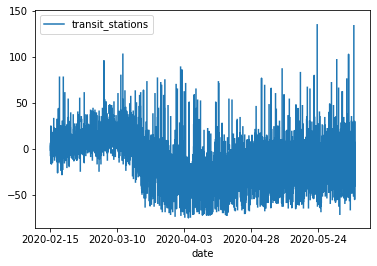

In [18]:
state_df = us_df_filtered[us_df_filtered['state']=='Texas']
state_df_sorted = state_df.sort_values(by=['date'], inplace=False)
state_df_sorted.plot(x='date', y='transit_stations')
state_df_sorted.head(10)

In [45]:
us_df_filtered_org = us_df_filtered.copy()

## Sort data by date

In [46]:
state_df_sorted_all = pd.DataFrame()

In [47]:
for i,j in enumerate(state_list):

    state_df = us_df_filtered[us_df_filtered['state']==state_list[i]]
    print(state_list[i])
    state_df_sorted = state_df.sort_values(by=['date'], inplace=False)
   
    
    state_df_sorted['transit_stations'].interpolate(method='linear', inplace=True)
    state_df_sorted['grocery_and_pharmacy'].interpolate(method='linear', inplace=True)
    state_df_sorted['retail_and_recreation'].interpolate(method='linear', inplace=True)
    state_df_sorted['workplaces'].interpolate(method='linear', inplace=True)
    state_df_sorted['residential'].interpolate(method='linear', inplace=True)
    state_df_sorted['parks'].interpolate(method='linear', inplace=True)

    state_df_sorted_all = state_df_sorted_all.append(state_df_sorted, ignore_index=True)
state_df_sorted_all = state_df_sorted_all.fillna(value=None, method='backfill', axis=None, limit=None, downcast=None)



Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [48]:
print(state_df_sorted_all.size)
print(state_df.size)

3883360
28080


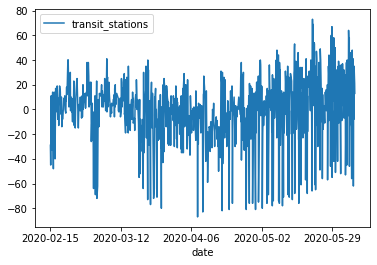

In [49]:
state_df_sorted.plot(x='date', y='transit_stations')

In [50]:
state_df_sorted_all.isnull().sum()

country_region_code           0
country_region                0
state                         0
county                        0
iso_3166_2_code          298720
census_fips_code              0
date                          0
retail_and_recreation         0
grocery_and_pharmacy          0
parks                         0
transit_stations              0
workplaces                    0
residential                   0
dtype: int64

In [51]:
state_df_sorted_all.head(20)

,country_region_code,country_region,state,county,iso_3166_2_code,census_fips_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,US,United States,Alabama,Autauga County,NaN,1001.0,2020-02-15,5.000000,7.0,55.000000,6.000000,-4.0,0.0
1,US,United States,Alabama,Coffee County,NaN,1031.0,2020-02-15,1.000000,4.0,55.000000,6.000000,2.0,0.0
2,US,United States,Alabama,Morgan County,NaN,1103.0,2020-02-15,7.000000,6.0,55.000000,6.000000,3.0,0.0
3,US,United States,Alabama,Cleburne County,NaN,1029.0,2020-02-15,0.333333,1.0,55.166667,6.666667,2.4,-0.1
4,US,United States,Alabama,Perry County,NaN,1105.0,2020-02-15,-6.333333,4.0,55.333333,7.333333,1.8,-0.2
5,US,United States,Alabama,Clay County,NaN,1027.0,2020-02-15,-13.000000,2.0,55.500000,8.000000,1.2,-0.3
6,US,United States,Alabama,Pickens County,NaN,1107.0,2020-02-15,10.000000,19.0,55.666667,8.666667,0.6,-0.4
7,US,United States,Alabama,Clarke County,NaN,1025.0,2020-02-15,7.000000,-18.0,55.833333,9.333333,0.0,-0.5
8,US,United States,Alabama,Pike County,NaN,1109.0,2020-02-15,3.000000,-2.0,56.000000,10.000000,-5.0,-0.6
9,US,United States,Alabama,Choctaw County,NaN,1023.0,2020-02-15,-0.500000,-9.0,56.166667,10.666667,-1.5,-0.7


In [55]:
data_preprocess = "./US_Mobility_Report_preprocess.csv"
state_df_sorted_all.to_csv (data_preprocess, index = False, header=True)

## Plot EDA result

KeyError: "['mobility_counts'] not in index"

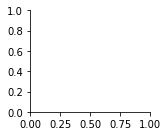

In [53]:
g = sns.FacetGrid(state_df, col="state", col_wrap=5, height=2)
g = g.map(plt.bar, "state", "mobility_counts", color="r")

Mobility data by locations

In [ ]:
# group by locations to see which locations have the most mobility data
location_df = us_df.groupby(["country_region"]).count()
# location_df = us_df.groupby(['retail_and_recreation',
#        'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces',
#        'residential'], as_index=False)["country_region_code"].count().sort_values(by="country_region_code",ascending=False)

# transpose dataframe 
location_df = location_df.transpose()

# selection locations by count of data
location_df = location_df.loc[["retail_and_recreation", "grocery_and_pharmacy", "parks", "transit_stations", "workplaces", "residential"]].reset_index()

# rename columns
location_df.columns = ["location", "mobility_count"]

In [ ]:
# plot location_df to see mobility data by location
plt.figure(figsize=(15,5))
ax = sns.barplot(x="location", y="mobility_count", 
                 data=location_df)